In [2]:
import matplotlib.pyplot as plt 
import skimage 
from skimage.data import coins 
import numpy as np 


coins = coins()


In [3]:
#original image
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ...,
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

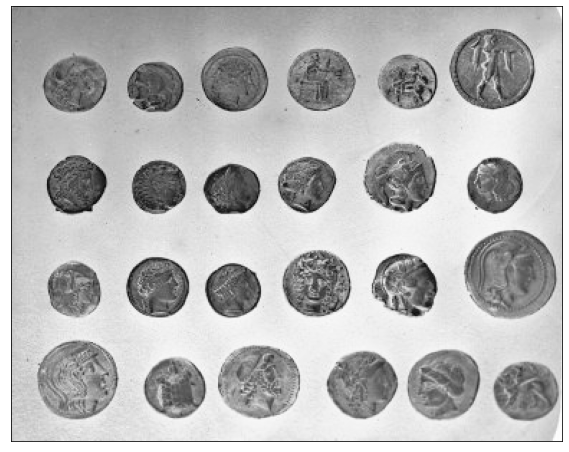

In [5]:
# show image
plt.figure(figsize=(10,8))
plt.imshow(coins, cmap='Greys')
plt.xticks(())
plt.yticks(())

plt.show()

In [6]:
#low the quality 
from scipy.ndimage.filters import gaussian_filter
from skimage.transform import rescale


In [7]:
smoothened_coins = gaussian_filter(coins, sigma=2)

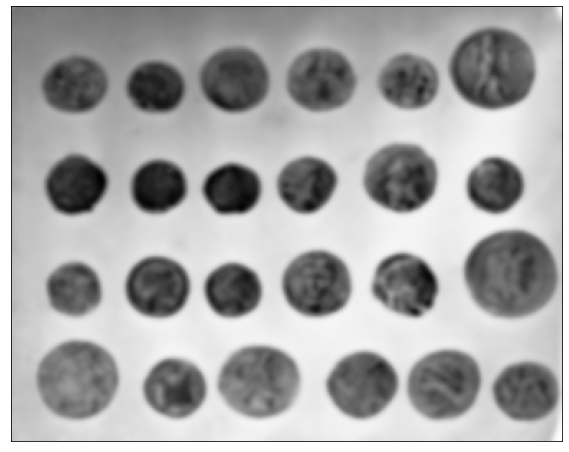

In [8]:
plt.figure(figsize=(10,8))
plt.imshow(smoothened_coins, cmap='Greys')
plt.xticks(())
plt.yticks(())

plt.show()

In [9]:
rescale_coins = rescale(smoothened_coins,0.2,mode='reflect',
anti_aliasing=True, multichannel=False)

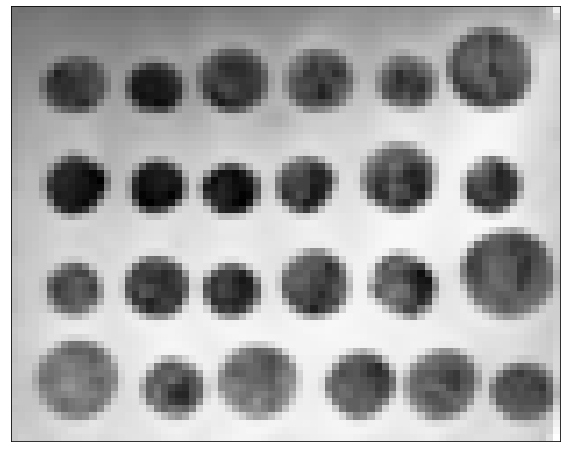

In [10]:
plt.figure(figsize=(10,8))
plt.imshow(rescale_coins, cmap='Greys')
plt.xticks(())
plt.yticks(())

plt.show()

In [11]:
rescale_coins.shape

(61, 77)

In [12]:
rescale_coins

array([[0.5057926 , 0.51372674, 0.50980392, ..., 0.37248598, 0.32509487,
        0.15272368],
       [0.50588235, 0.50215365, 0.50215365, ..., 0.35692202, 0.32526101,
        0.23814825],
       [0.49443909, 0.49051752, 0.48659595, ..., 0.34529216, 0.33325694,
        0.30913349],
       ...,
       [0.28627451, 0.28980451, 0.28627451, ..., 0.2817205 , 0.27035279,
        0.14040627],
       [0.28649284, 0.27824227, 0.27823851, ..., 0.2785587 , 0.25398147,
        0.0936046 ],
       [0.29015767, 0.26660363, 0.27058824, ..., 0.28627451, 0.21093648,
        0.05083971]])

In [13]:
#makes the array into one dimension for the value of x
X = np.reshape(rescale_coins, (-1,1))

X.shape

(4697, 1)

In [14]:
print(X)

[[0.5057926 ]
 [0.51372674]
 [0.50980392]
 ...
 [0.28627451]
 [0.21093648]
 [0.05083971]]


In [15]:
from sklearn.cluster import AgglomerativeClustering

n_clusters = 10
ac = AgglomerativeClustering(n_clusters=n_clusters, linkage='average')
ac.fit(X)


AgglomerativeClustering(linkage='average', n_clusters=10)

In [16]:
print(ac)

AgglomerativeClustering(linkage='average', n_clusters=10)


In [17]:
# the result of the 10 clusters
ac.labels_

array([2, 2, 2, ..., 1, 0, 9])

In [18]:
labels = np.reshape(ac.labels_,rescale_coins.shape)
labels.shape

(61, 77)

In [19]:
print(labels)

[[2 2 2 ... 6 1 0]
 [2 2 2 ... 6 1 1]
 [2 2 2 ... 6 6 1]
 ...
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 1 0]
 [1 1 1 ... 1 0 9]]


In [20]:
print(type(labels))

<class 'numpy.ndarray'>


In [21]:
unique_labels = np.unique(labels)
unique_labels

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

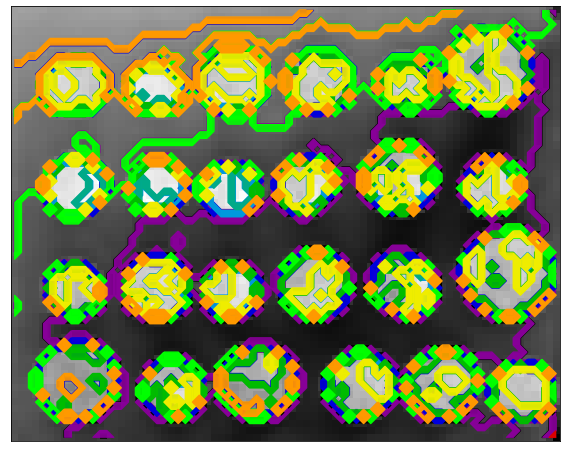

In [22]:
 plt.figure(figsize=(10,8))
 plt.imshow(rescale_coins,cmap=plt.cm.gray)

 for l in unique_labels:
     plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l/ float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()

In [23]:
from sklearn.feature_extraction.image import grid_to_graph

connectivity = grid_to_graph(*rescale_coins.shape)
connectivity.shape

(4697, 4697)

In [24]:
n_clusters=30

ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=connectivity)
ward.fit(X)


AgglomerativeClustering(connectivity=<4697x4697 sparse matrix of type '<class 'numpy.int64'>'
	with 23209 stored elements in COOrdinate format>,
                        n_clusters=30)

In [25]:
labels = np.reshape(ward.labels_,rescale_coins.shape)

In [26]:
unique_labels = np.unique(labels)
print('unique lables:', unique_labels)

unique lables: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]


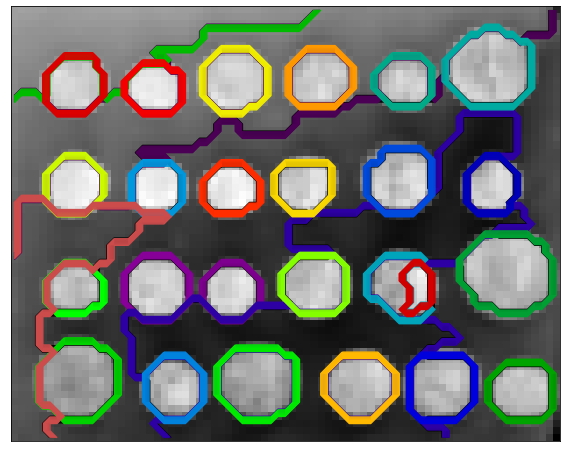

In [27]:
 plt.figure(figsize=(10,8))
 plt.imshow(rescale_coins,cmap=plt.cm.gray)

 for l in unique_labels:
     plt.contour(labels == l, colors=[plt.cm.nipy_spectral(l/ float(n_clusters))])

plt.xticks(())
plt.yticks(())

plt.show()